# Code for Figure 6 and associated statistics reported in the text

Developed by Siobhan Powell, 2021. 

In [1]:
import os
os.chdir('../')

In [2]:
from matplotlib.gridspec import GridSpec
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [6]:
def load_emissions_values(noev_scenario, solar=2.5, wind=2.5, folder='Fuel1_Solar25_Wind25'):
    
    scens1 = ['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem']
    scens2 = ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']

    vals1 = np.zeros((6, 5)) # overgeneration
    tables_dfs1 = pd.DataFrame(np.zeros((6, 5)), 
                              index=['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                              columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual'])

    for i, scen1 in enumerate(scens1):
        for j, scen2 in enumerate(scens2):
            penlevel = 1.0
            overgen = None
            try: 
                dpdf = pd.read_csv('Results/'+folder+'/fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_dpdf_20211119.csv')
            except:
                try:
                    dpdf = pd.read_csv('Results/'+folder+'/fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_withstorage_dpdf_20211119.csv')
                except: 
                    print('Error for ', penlevel, scen1, scen2)

            # assumes 5 miles / kWh
            vals1[i, j] = 0.2 * (dpdf.co2_tot.sum() - noev_scenario.co2_tot.sum()) / (dpdf.total_incl_noncombustion.sum() - noev_scenario.total_incl_noncombustion.sum()) # Emissions / total miles
            tables_dfs1.loc[scen1, scen2] = 0.2 * (dpdf.co2_tot.sum() - noev_scenario.co2_tot.sum()) / (dpdf.total_incl_noncombustion.sum() - noev_scenario.total_incl_noncombustion.sum()) # Emissions / total miles

    scen2 = 'BusinessAsUsual'
    scen1 =  '_TimersMixed_WPcontrol_minpeak'
    i = i+1
    j = j+1
    overgen = None
    try: 
        dpdf = pd.read_csv('Results/'+folder+'/fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_dpdf_20211119.csv')
    except:
        try:
            dpdf = pd.read_csv('Results/'+folder+'/fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_withstorage_dpdf_20211119.csv')
        except: 
            print('Error for ', penlevel, scen1, scen2)
            print('Results/'+folder+'/fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_withstorage_dpdf_20211119.csv')

    # assumes 5 miles / kWh
    vals1[i, j] = 0.2 * (dpdf.co2_tot.sum() - noev_scenario.co2_tot.sum()) / (dpdf.total_incl_noncombustion.sum() - noev_scenario.total_incl_noncombustion.sum()) # Emissions / total miles
    tables_dfs1.loc[scen1, scen2] = 0.2 * (dpdf.co2_tot.sum() - noev_scenario.co2_tot.sum()) / (dpdf.total_incl_noncombustion.sum() - noev_scenario.total_incl_noncombustion.sum()) # Emissions / total miles

    return vals1, tables_dfs1


In [4]:
noev_scenario_1 = pd.read_csv('Results/NoEVs_year2030_solar1x_wind1x_dpdf_20211119.csv')
noev_scenario_2 = pd.read_csv('Results/NoEVs_year2030_solar2.5x_wind2.5x_dpdf_20211119.csv')
noev_scenario_5 = pd.read_csv('Results/NoEVs_year2030_solar5x_wind5x_dpdf_20211119.csv')

In [7]:
vals_1, tables_dfs_1 = load_emissions_values(noev_scenario_1, solar=1, wind=1, folder='Fuel1_Solar1_Wind1')

In [8]:
vals_2, tables_dfs_2 = load_emissions_values(noev_scenario_2, solar=2.5, wind=2.5, folder='Fuel1_Solar25_Wind25')

In [9]:
vals_5, tables_dfs_5 = load_emissions_values(noev_scenario_5, solar=5, wind=5, folder='Fuel1_Solar5_Wind5')

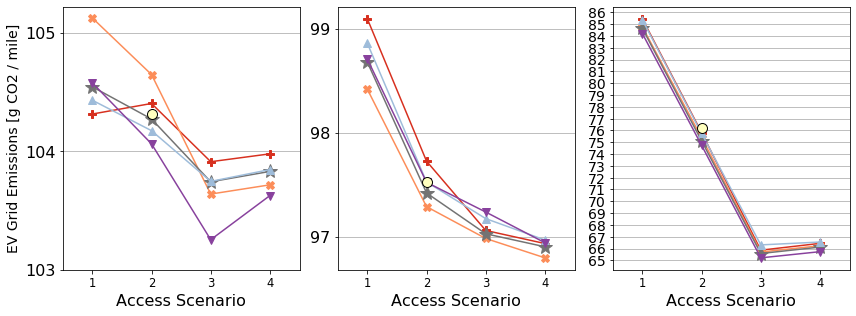

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4.5), sharey=False, sharex=True)
titles = ['1', '2', '3', '4'] #['AllAtHomeL2Access', 'BaseCase', 'LessHome_MoreWork', 'LessHome_MorePublic']

colors = ['#d7301f', '#fc8d59', '#737373', '#9ebcda', '#88419d']
# control_labels = ['9pm Timers; No Work Control', '12am Timers; No Work Control', 'No Timers; No Work Control', 'No Timers; Min(Peak) Work Control', 'No Timers; Max(Solar) Work Control']
control_labels = ['9pm SFH Timers', '12am SFH Timers', 'Uncontrolled', 'Min(Peak) Work Control', 'Min(Avg Em) Work Control']

titles2 = ['Total Emissions / Total Energy', 'Fraction of Total Energy Served by Renewables', 
          'Total Fuel Costs / Total Energy', 'Size of Battery Needed']
units = ['[kg CO2 / MWh]', 'Fraction', '[$ / MWh]', '[MW]']

for i in range(3):
    axes[i].set_xticks(np.arange(0, 4))
    axes[i].set_xticklabels(labels=titles, fontsize=11.5)
    axes[i].set_xlabel('Access Scenario', fontsize=16)

shifts = [-0.2, -0.1, 0, 0.1, 0.2]
ms = [8, 8, 14, 8, 8]
lines = ['-P', '-X', '-*', '-^','-v']

for control_idx in range(5):
    axes[0].plot(np.arange(0, 4), vals_1[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], ms=ms[control_idx], zorder=1)
axes[0].scatter([1], np.array(vals_1[5, 4]), label='Business As Usual', marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2)

for control_idx in range(5):
    axes[1].plot(np.arange(0, 4), vals_2[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], ms=ms[control_idx], zorder=1)
axes[1].scatter([1], np.array(vals_2[5, 4]), label='Business As Usual', marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2)

for control_idx in range(5):
    axes[2].plot(np.arange(0, 4), vals_5[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], ms=ms[control_idx], zorder=1)
axes[2].scatter([1], np.array(vals_5[5, 4]), label='Business As Usual', marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2)

axes[0].set_xlim([-0.5, 3.5])

axes[1].set_yticks([97, 98, 99])
axes[1].set_yticklabels([97, 98, 99], fontsize=16)
axes[0].set_yticks([103, 104, 105])
axes[0].set_yticklabels([103, 104, 105], fontsize=16)
axes[2].set_yticks(np.arange(65, 87))
axes[2].set_yticklabels(np.arange(65, 87), fontsize=14)
for i in range(3):
    axes[i].set_axisbelow(True)        
    axes[i].grid(axis='y')

axes[0].set_ylabel('EV Grid Emissions [g CO2 / mile]', fontsize=14)

plt.tight_layout()
plt.savefig('MainPlotting/Plots/fig6a.pdf', bbox_inches='tight')
plt.show()

# Statistics

In [23]:
print('Worst scenario is higher than best scenario by _% in each case: ')
print(np.round(100*(((vals_1[vals_1>0]).max() / (vals_1[vals_1>0]).min()) - 1), 2))
print(np.round(100*(((vals_2[vals_2>0]).max() / (vals_2[vals_2>0]).min()) - 1), 2))
print(np.round(100*(((vals_5[vals_5>0]).max() / (vals_5[vals_5>0]).min()) - 1), 2))

Worst scenario is higher than best scenario by _% in each case: 
1.81
2.37
31.03


In [24]:
print('How much does adding control change things? ')

How much does adding control change things? 


In [39]:
def maxchange_control(vals_1):
    maxchange = 0
    for i in range(5):
        if i != 2:
            for j in range(4):
                chg = np.abs((vals_1[i, j] - vals_1[2, j]) / vals_1[2, j])
                if chg > maxchange:
                    maxchange = chg

    chg = np.abs((vals_1[5, 4] - vals_1[2, 1]) / vals_1[2, 1])
    if chg > maxchange:
        maxchange = chg
    
    return maxchange

print('Grid 1: ', maxchange_control(vals_1))
print('Grid 2.5: ', maxchange_control(vals_2))
print('Grid 5: ', maxchange_control(vals_5))

Grid 1:  0.005555669565149484
Grid 2.5:  0.00421683750513597
Grid 5:  0.01398776278043346


In [41]:
print('Range in base case grid: ', np.round(vals_2[vals_2>0].min(), 3), np.round(vals_2[vals_2>0].max(), 3))

Range in base case grid:  96.797 99.094
